In [ ]:
!pip install  -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#upload your json api file from kaggle

In [2]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 74% 49.0M/66.0M [00:00<00:00, 66.2MB/s]
100% 66.0M/66.0M [00:00<00:00, 122MB/s] 


In [3]:
!unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv1D,Dropout,BatchNormalization,MaxPool1D

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.2.0


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape

(284807, 31)

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Balanced **Data**

In [10]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape,fraud.shape

((284315, 31), (492, 31))

In [12]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [ ]:
data = fraud.append(non_fraud,ignore_index=True)

In [14]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1238.0,1.107705,0.043973,0.142643,1.431250,-0.162959,0.076966,-0.192446,0.034237,0.825647,-0.716975,-1.328283,0.260635,0.348643,-1.579502,-0.423336,0.189679,0.570114,0.438394,0.148719,0.044478,-0.119887,-0.138001,-0.289963,-0.498155,0.780038,-0.231794,0.062210,0.054007,66.21,0
980,128055.0,2.062095,-0.021626,-1.668593,0.599824,0.235160,-1.287888,0.528846,-0.442646,0.397648,0.134178,-1.074946,0.180654,-0.329946,0.464021,-0.424868,-0.524804,-0.133203,-0.726605,0.193264,-0.227518,-0.031282,0.084674,0.040344,-0.064346,0.224424,0.385842,-0.087391,-0.073315,19.95,0
981,67702.0,0.080661,-0.464167,0.171488,-2.716576,0.064470,-0.320578,0.232983,-0.159566,-2.262694,1.574528,0.387401,-1.345843,-1.006339,0.049219,-0.787956,-0.537041,0.067065,0.248138,-0.624182,-0.267196,-0.053813,0.427711,-0.004391,-0.712993,-0.820431,-0.392100,0.289196,0.038169,25.00,0
982,150908.0,-1.351292,1.535749,-2.474230,-0.690587,-2.537770,3.783982,4.483791,-0.647680,0.429598,-0.033932,2.133618,0.233536,-0.154971,-1.231294,1.402230,-0.718019,0.937489,-0.788526,-1.302014,-1.328255,-0.031246,1.744950,-0.511179,-1.656423,-0.873657,-0.250611,-1.509812,-1.807133,806.50,0


In [16]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
 X = data.drop('Class',axis=1)
 y = data['Class']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((787, 30), (197, 30))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [22]:
X_train.shape

(787, 30)

#Convulation take three dimminsional data

In [23]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train.shape,X_test.shape

((787, 30, 1), (197, 30, 1))

# Build Model

In [ ]:
epochs = 20
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))



In [26]:
model.summary()  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)             

In [ ]:
model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 18ms/step - loss: 0.9557 - accuracy: 0.6125 - val_loss: 0.6124 - val_accuracy: 0.8325
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5818 - accuracy: 0.7764 - val_loss: 0.5642 - val_accuracy: 0.8325
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.4997 - accuracy: 0.8018 - val_loss: 0.5245 - val_accuracy: 0.8376
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.4376 - accuracy: 0.8335 - val_loss: 0.4924 - val_accuracy: 0.8579
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.4066 - accuracy: 0.8501 - val_loss: 0.4588 - val_accuracy: 0.8782
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3897 - accuracy: 0.8628 - val_loss: 0.4249 - val_accuracy: 0.8985
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.3032 - accuracy: 0.8907 - val_loss: 0.3895 - val_accuracy: 0.9239
Epoch 8/20
25/25 [=

In [ ]:
def plot_learningcurve(history,epoch):
  #plot training and validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()
  
  # plot training and validation Loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

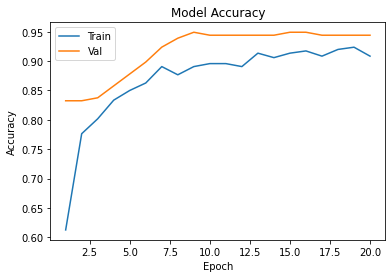

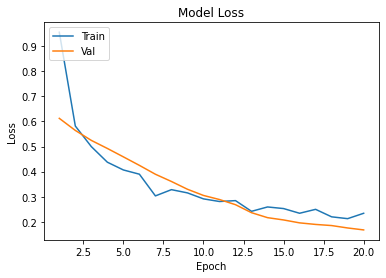

In [34]:
plot_learningcurve(history,epochs)

In [ ]:
# adding Maxpoll

Epoch 1/50
25/25 [==============================] - 0s 11ms/step - loss: 1.1563 - accuracy: 0.5540 - val_loss: 0.6718 - val_accuracy: 0.5990
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 1.0235 - accuracy: 0.6277 - val_loss: 0.6415 - val_accuracy: 0.6853
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.8308 - accuracy: 0.6785 - val_loss: 0.6080 - val_accuracy: 0.7208
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.7155 - accuracy: 0.6976 - val_loss: 0.5737 - val_accuracy: 0.7107
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.7116 - accuracy: 0.7255 - val_loss: 0.5427 - val_accuracy: 0.7056
Epoch 6/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6460 - accuracy: 0.7421 - val_loss: 0.5123 - val_accuracy: 0.7107
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6022 - accuracy: 0.7637 - val_loss: 0.4822 - val_accuracy: 0.7360
Epoch 8/50
25/25 [=

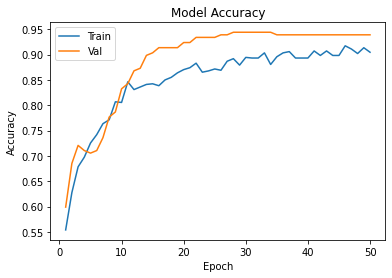

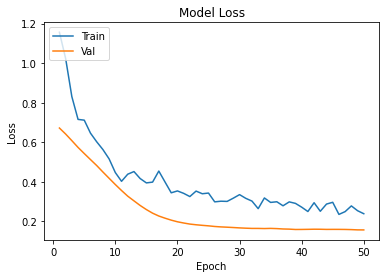

In [36]:
epochs = 50
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)
plot_learningcurve(history,epochs)
